<a href="https://colab.research.google.com/github/gjwubyron/NLP/blob/main/Practical3_SkeletonMNIST_GuojunWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11490434/11490434 [==============================] - 0s 0us/step


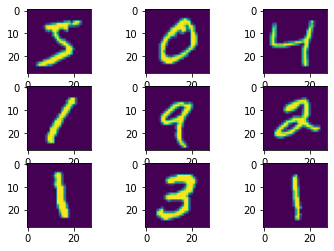

(60000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [ ]:
# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

## Build and train the model

Build and train your model. 

In [ ]:
# TODO: Build your model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=24, kernel_size=5, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=48, kernel_size=5, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=5, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), 
    keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
# Train model
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=64, epochs=20, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
750/750 [==============================] - 16s 9ms/step - loss: 0.2053 - accuracy: 0.9362 - val_loss: 0.0472 - val_accuracy: 0.9859
Epoch 2/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0549 - accuracy: 0.9841 - val_loss: 0.0413 - val_accuracy: 0.9874
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0382 - val_accuracy: 0.9900
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0335 - val_accuracy: 0.9917
Epoch

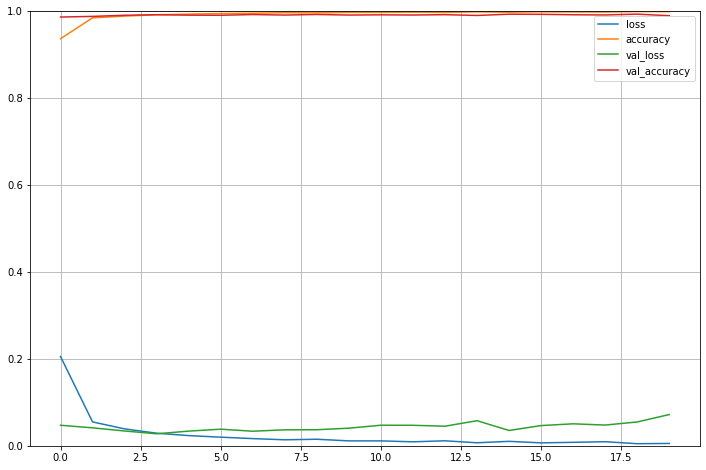

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [ ]:
model.save('FDS22-M058-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [ ]:
model = keras.models.load_model("FDS22-M058-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0473 - accuracy: 0.9920


[0.047348082065582275, 0.9919999837875366]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

**To be honest, it is not a very challenging task to achieve 97% accuracy in this dataset. Thus, I decide to first try a relatively simple and shallow architecture with three layers with a broad fully connected layer. I do feel a little lucky, because it turns out working pretty good in my first attempt.**